# Data Mining

In [35]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [ ]:
scaler.inverse_transform

In [2]:
movies_df = pd.read_csv("movie_metadata.csv")
print ("data-frame shape: ", movies_df.shape)

data-frame shape:  (5043, 28)


In [3]:
movies_df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [4]:
movies_df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [5]:
movies_df.isna().sum().sum()

2698

In [6]:
movies_df.language.fillna("no info", inplace=True)

In [7]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [8]:
movies_df.budget.fillna(movies_df.budget.mean(), inplace=True)
movies_df.gross.fillna(movies_df.gross.mean(), inplace=True)
movies_df.num_critic_for_reviews.fillna(movies_df.num_critic_for_reviews.mean(), inplace=True)
movies_df.duration.fillna(movies_df.duration.mean(), inplace=True)
movies_df.actor_1_facebook_likes.fillna(movies_df.actor_1_facebook_likes.mean(), inplace=True)
movies_df.actor_2_facebook_likes.fillna(movies_df.actor_2_facebook_likes.mean(), inplace=True)
movies_df.actor_3_facebook_likes.fillna(movies_df.actor_3_facebook_likes.mean(), inplace=True)
movies_df.director_facebook_likes.fillna(movies_df.director_facebook_likes.mean(), inplace=True)
movies_df.facenumber_in_poster.fillna(movies_df.facenumber_in_poster.mean(), inplace=True)
movies_df.num_user_for_reviews.fillna(movies_df.num_user_for_reviews.mean(), inplace=True)

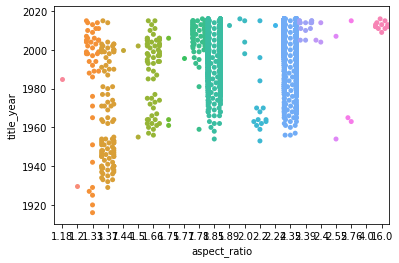

In [34]:
sns.swarmplot(x=movies_df.aspect_ratio, y=movies_df.title_year)

In [32]:
movies_df.loc[movies_df["content_rating"] == "X",["movie_title","director_name","imdb_score"]]

,movie_title,director_name,imdb_score
1420,A Nightmare on Elm Street,Wes Craven,7.5
3559,Dressed to Kill,Brian De Palma,7.1
3593,A Nightmare on Elm Street 5: The Dream Child,Stephen Hopkins,5.1
3608,Halloween 5,Dominique Othenin-Girard,5.2
3703,A Nightmare on Elm Street 3: Dream Warriors,Chuck Russell,6.6
3829,The Texas Chainsaw Massacre 2,Tobe Hooper,5.5
3844,Fast Times at Ridgemont High,Amy Heckerling,7.2
3983,Midnight Cowboy,John Schlesinger,7.9
4003,Evil Dead II,Sam Raimi,7.8
4352,A Nightmare on Elm Street,Wes Craven,7.5


In [24]:
movies_df.loc[movies_df["director_name"] == "Hayao Miyazaki",["movie_title","director_name","imdb_score","title_year"]]

,movie_title,director_name,imdb_score,title_year
1517,Ponyo,Hayao Miyazaki,7.7,2008.0
2047,Howl's Moving Castle,Hayao Miyazaki,8.2,2004.0
2323,Princess Mononoke,Hayao Miyazaki,8.4,1997.0
2373,Spirited Away,Hayao Miyazaki,8.6,2001.0


In [11]:
print(movies_df.duplicated().sum())

45


In [12]:
movies_df.drop_duplicates(inplace=True)

In [13]:
movies_df.shape

(4998, 28)

# Data Binning

In [14]:
labels = ["shit","moderate","good"]
category = [0,4,7,10]

In [15]:
movies_df["imdb_labels"] = pd.cut(movies_df["imdb_score"], labels=labels, bins=category)

In [16]:
movies_df[['movie_title', 'facenumber_in_poster']].sort_values("facenumber_in_poster", ascending=False).head()

,movie_title,facenumber_in_poster
3468,500 Days of Summer,43.0
1364,The Master,31.0
2302,Battle of the Year,19.0
1193,Cheaper by the Dozen,15.0
317,The Expendables 3,15.0


In [17]:
movies_df_num =movies_df.select_dtypes(exclude=["object","category"])

In [18]:
movies_df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 5042
Data columns (total 16 columns):
num_critic_for_reviews       4998 non-null float64
duration                     4998 non-null float64
director_facebook_likes      4998 non-null float64
actor_3_facebook_likes       4998 non-null float64
actor_1_facebook_likes       4998 non-null float64
gross                        4998 non-null float64
num_voted_users              4998 non-null int64
cast_total_facebook_likes    4998 non-null int64
facenumber_in_poster         4998 non-null float64
num_user_for_reviews         4998 non-null float64
budget                       4998 non-null float64
title_year                   4891 non-null float64
actor_2_facebook_likes       4998 non-null float64
imdb_score                   4998 non-null float64
aspect_ratio                 4671 non-null float64
movie_facebook_likes         4998 non-null int64
dtypes: float64(13), int64(3)
memory usage: 663.8 KB


In [29]:
movies_df.loc[movies_df["title_year"].isna(),["movie_title","title_year"]]

,movie_title,title_year
4,Star Wars: Episode VII - The Force Awakens ...,NaN
177,Miami Vice,NaN
260,The A-Team,NaN
279,"10,000 B.C.",NaN
404,Hannibal,NaN
459,Daredevil,NaN
479,Bewitched,NaN
537,Constantine,NaN
543,Life,NaN
593,Sleepy Hollow,NaN


In [19]:
movies_df_num=movies_df_num.dropna()

In [20]:
movies_df_num = movies_df_num[(abs(stats.zscore(movies_df_num))<3).all(axis=1)]

In [21]:
movies_df_num.shape

(3778, 16)

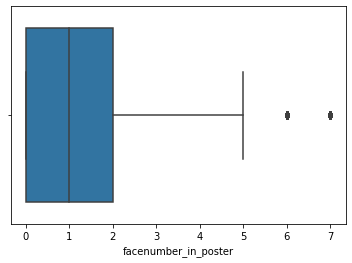

In [23]:
sns.boxplot(x=movies_df_num["facenumber_in_poster"])